**Fifa19_EDA**

### Import libariers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [4]:
df= pd.read_csv(r'D:\Data science\practice\datasets\fifa_eda.csv')
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [27]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [28]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


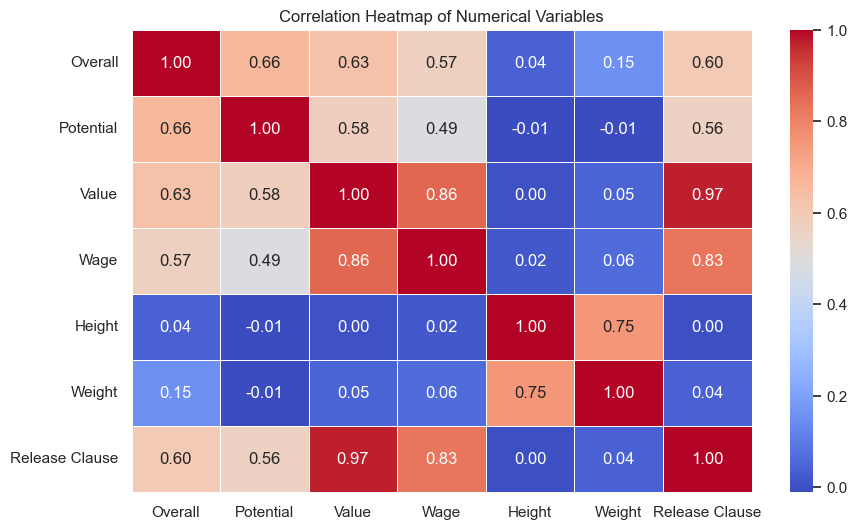

In [29]:
correlation_matrix =df[['Overall','Potential','Value', 'Wage', 'Height', 'Weight', 'Release Clause']].corr()

# Create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Data Cleaning 

## Check for Duplicates

In [30]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [32]:
# Convert the joined column to datetime
df['Joined'] = pd.to_datetime(df['Joined'], format='%Y')

# Convert 'Contract Valid Until' to datetime
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'],format='%Y-%m-%d')

# Get the current date
current_date = pd.to_datetime('today')

# Calculate the number of years since joining
df['Years Since Joining'] = (current_date - df['Joined']).dt.days / 365

# Calculate the number of years until contract expiry
df['Years Until Expiry'] = (df['Contract Valid Until'] - current_date).dt.days / 365

# Display the updated dataframe
df[['ID', 'Name', 'Joined', 'Contract Valid Until', 'Years Since Joining', 'Years Until Expiry']]

,ID,Name,Joined,Contract Valid Until,Years Since Joining,Years Until Expiry
0,158023,L. Messi,2004-01-01,2021-01-01,21.084932,-4.073973
1,20801,Cristiano Ronaldo,2018-01-01,2022-01-01,7.073973,-3.073973
2,190871,Neymar Jr,2017-01-01,2022-01-01,8.073973,-3.073973
3,193080,De Gea,2011-01-01,2020-01-01,14.079452,-5.076712
4,192985,K. De Bruyne,2015-01-01,2023-01-01,10.076712,-2.073973
...,...,...,...,...,...,...
18202,238813,J. Lundstram,2017-01-01,2019-01-01,8.073973,-6.076712
18203,243165,N. Christoffersson,2018-01-01,2020-01-01,7.073973,-5.076712
18204,241638,B. Worman,2017-01-01,2021-01-01,8.073973,-4.073973
18205,246268,D. Walker-Rice,2018-01-01,2019-01-01,7.073973,-6.076712


# Visualizing Data Distributions

In [34]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
df_numerical = df[numerical_columns]
z_scores = df_numerical.apply(zscore)

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores.abs() > 3).sum()

print("Number of outliers in each numerical column:")
print(outliers)

Number of outliers in each numerical column:
Value               0
Wage              307
Overall            55
Potential          66
Height             38
Weight             52
Release Clause    315
dtype: int64


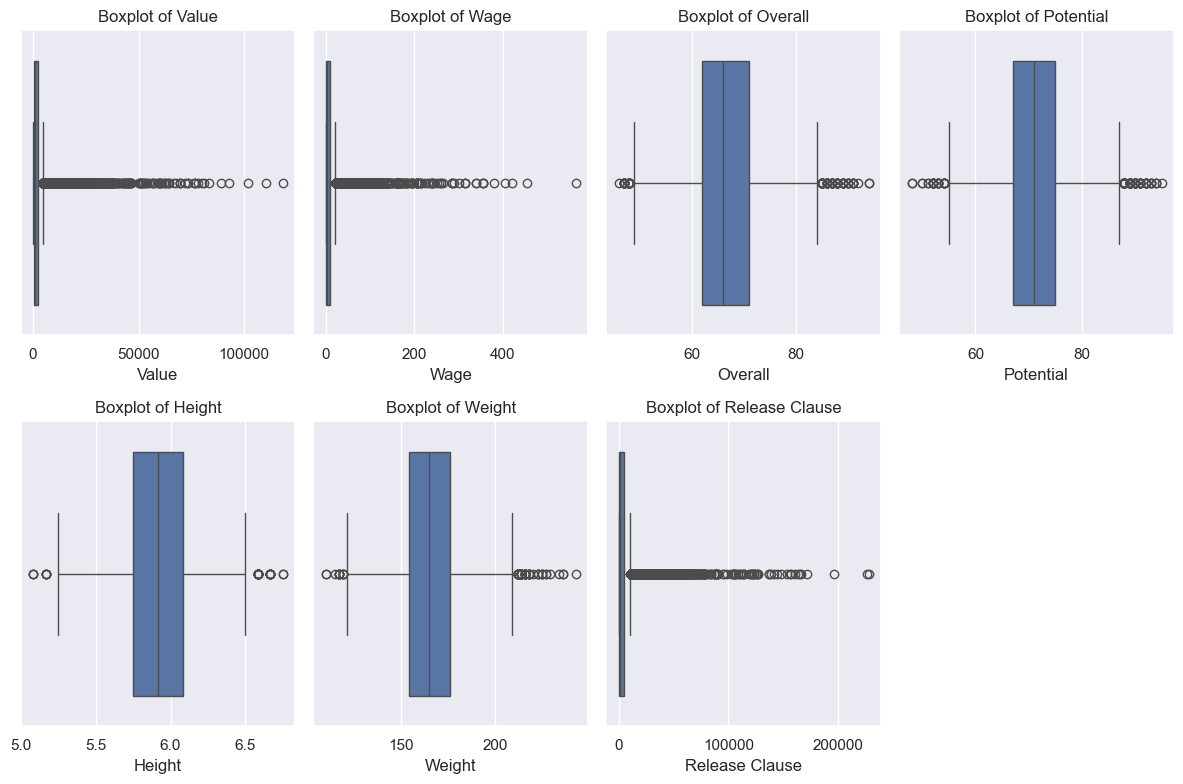

In [33]:
# Create boxplots for the numerical columns to visually inspect outliers
numerical_columns = ['Value', 'Wage', 'Overall', 'Potential', 'Height', 'Weight', 'Release Clause']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

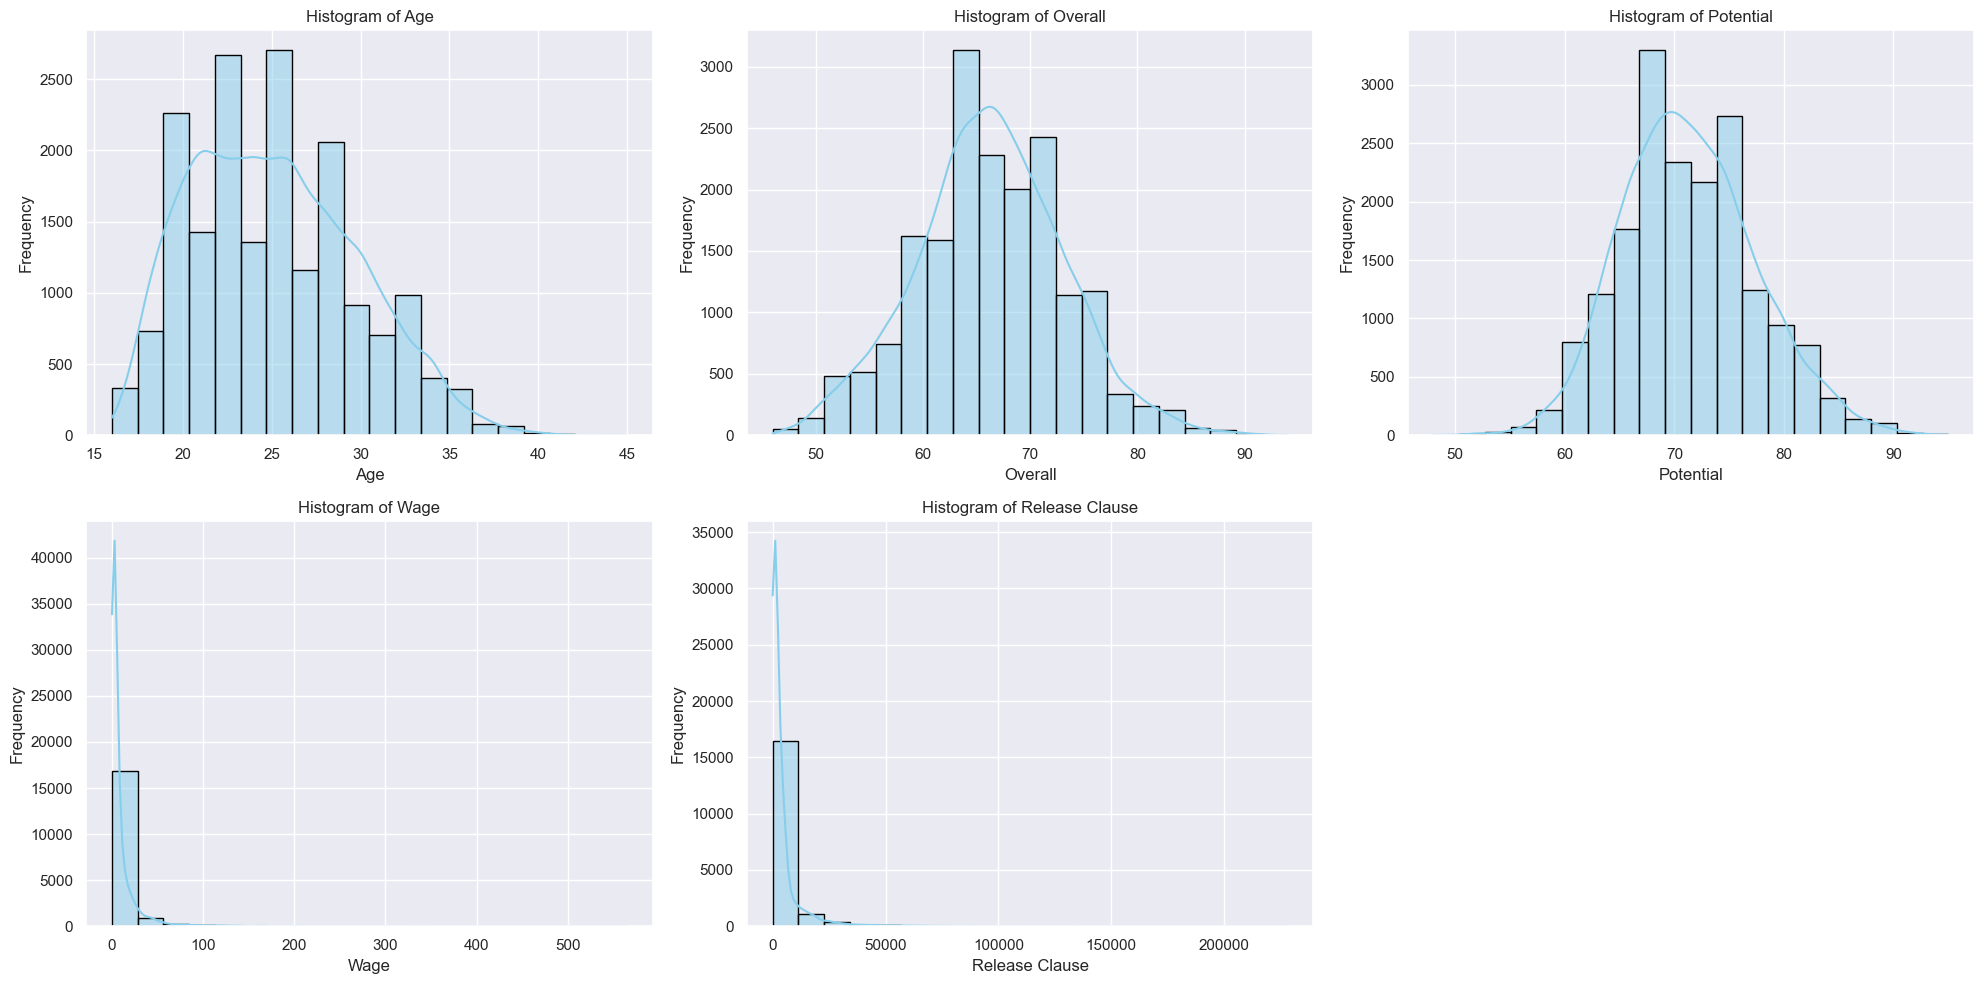

In [35]:
# List of numerical columns to plot
numerical_columns = ['Age', 'Overall', 'Potential', 'Wage', 'Release Clause']

# Loop through each columns and plot histogram
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,3,i) # Create a 2x3 grid of subplots
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

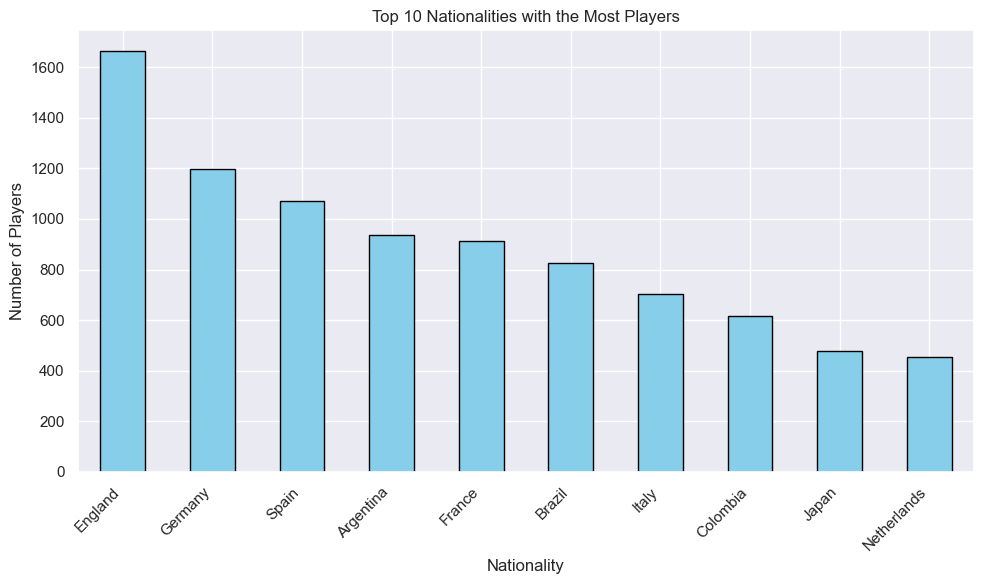

In [38]:
# Count the occurrences of each nationality
nationality_counts = df.Nationality.value_counts()

# Get the top 10 nationalities with the most players
top_10_nationalities = nationality_counts.head(10)

# Plot the top 10 nationalities
plt.figure(figsize=(10, 6))
top_10_nationalities.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Top 10 Nationalities with the Most Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Years Since Joining,Years Until Expiry
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004-01-01,2021-01-01,5.583333,159.0,226500.0,21.084932,-4.073973
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018-01-01,2022-01-01,6.166667,183.0,127100.0,7.073973,-3.073973
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017-01-01,2022-01-01,5.750000,150.0,228100.0,8.073973,-3.073973
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011-01-01,2020-01-01,6.333333,168.0,138600.0,14.079452,-5.076712
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015-01-01,2023-01-01,5.916667,154.0,196400.0,10.076712,-2.073973


Preferred Foot
Right    13996
Left      4211
Name: count, dtype: int64


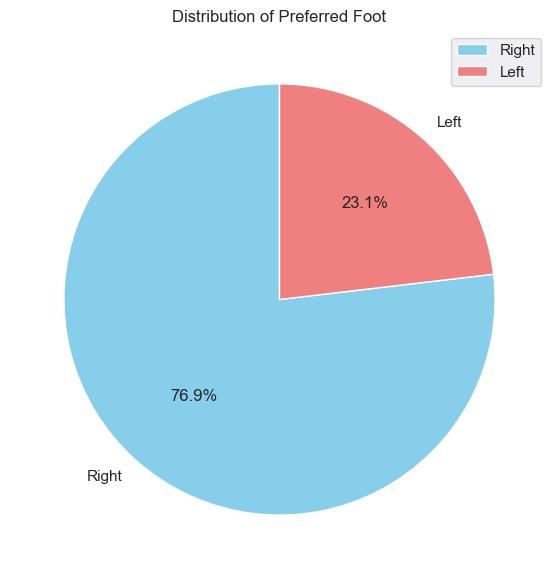

In [47]:
# Count the occurrences of each preferred foot (Left or Right)
preferred_foot_counts = df['Preferred Foot'].value_counts()

# Display the counts for Left and Right foot
print(preferred_foot_counts)

# Plot a pie chart for visual representation
plt.figure(figsize=(7, 7))
preferred_foot_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90, legend=True)
# Add title
plt.title('Distribution of Preferred Foot')
plt.ylabel('')  # Remove the y-label for clarity
plt.show()

In [43]:
prefered_foot_counts

<bound method IndexOpsMixin.value_counts of 0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object>

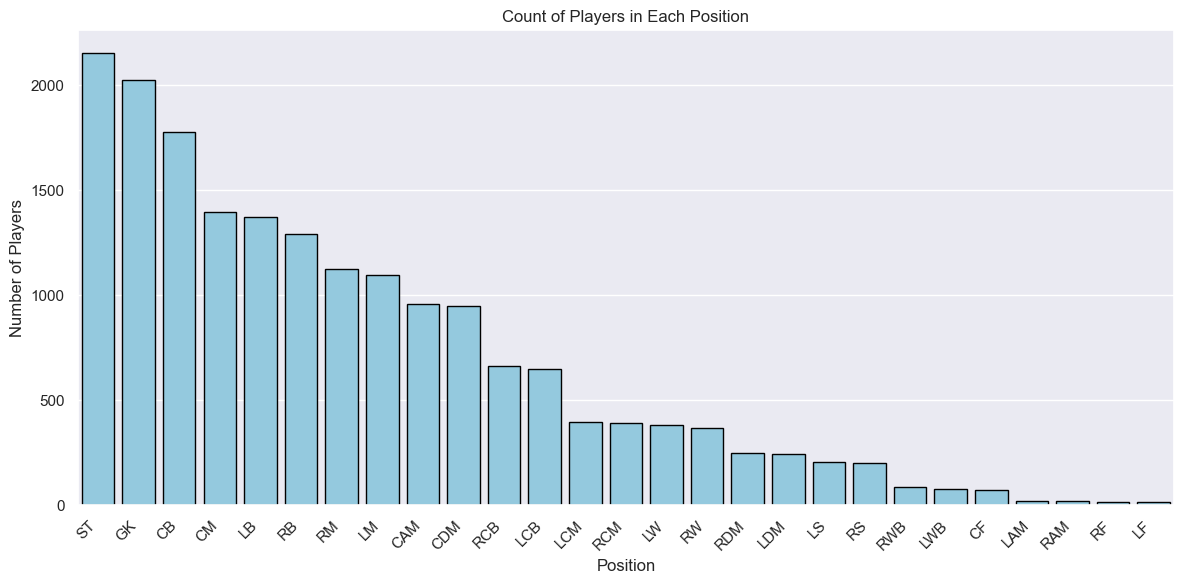

In [54]:
# Count the occurrences of each position
position_counts = df['Position'].value_counts()

# Plot the bar chart for player positions
plt.figure(figsize=(12, 6))
sns.barplot(position_counts,color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [56]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause', 'Years Since Joining',
       'Years Until Expiry'],
      dtype='object')

In [58]:
# Calculate the average Overall and Potential ratings by position
average_ratings_by_position = df.groupby('Position')[['Overall', 'Potential']].mean()

# Display the result
average_ratings_by_position

,Overall,Potential
Position,,
CAM,66.905109,72.635036
CB,65.024733,70.905003
CDM,66.313291,71.504219
CF,65.824324,72.743243
CM,63.731183,70.903943
GK,64.593981,69.790824
LAM,71.857143,72.523810
LB,65.713557,70.382653
LCB,69.240741,72.308642


In [61]:
# Calculate the average Value and Wage by position
average_value_wage_by_position = df.groupby('Position')[['Value', 'Wage']].mean()

average_value_wage_by_position

,Value,Wage
Position,,
CAM,3112.045455,10.218978
CB,1610.045688,7.700393
CDM,2100.555556,9.315401
CF,3271.621622,10.216216
CM,1990.733479,8.334767
GK,1614.517345,6.797237
LAM,6065.476190,26.142857
LB,1692.740385,8.467930
LCB,3072.023622,11.498457


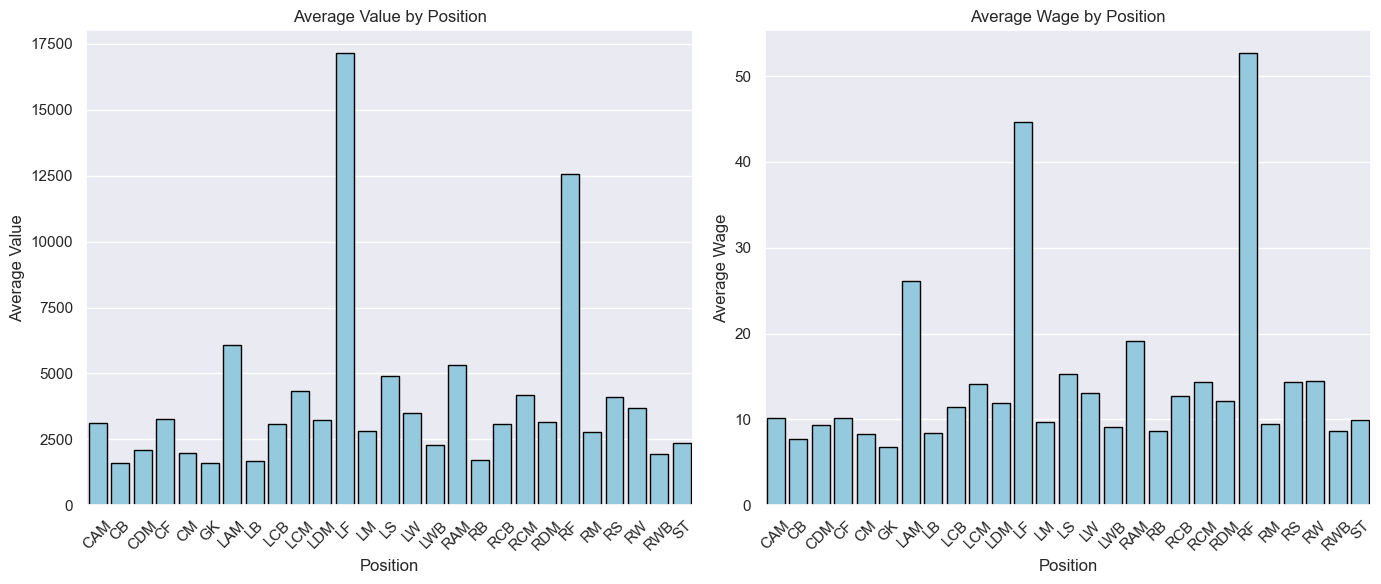

In [63]:
# Plot the average Value and Wage by position
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Average Value by Position
sns.barplot(average_value_wage_by_position.Value, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Average Value by Position')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Average Value')
axes[0].tick_params(axis='x', rotation=45)



sns.barplot(average_value_wage_by_position.Wage, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Average Wage by Position')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Average Wage')
axes[1].tick_params(axis='x', rotation=45)


# Adjust layout
plt.tight_layout()
plt.show()

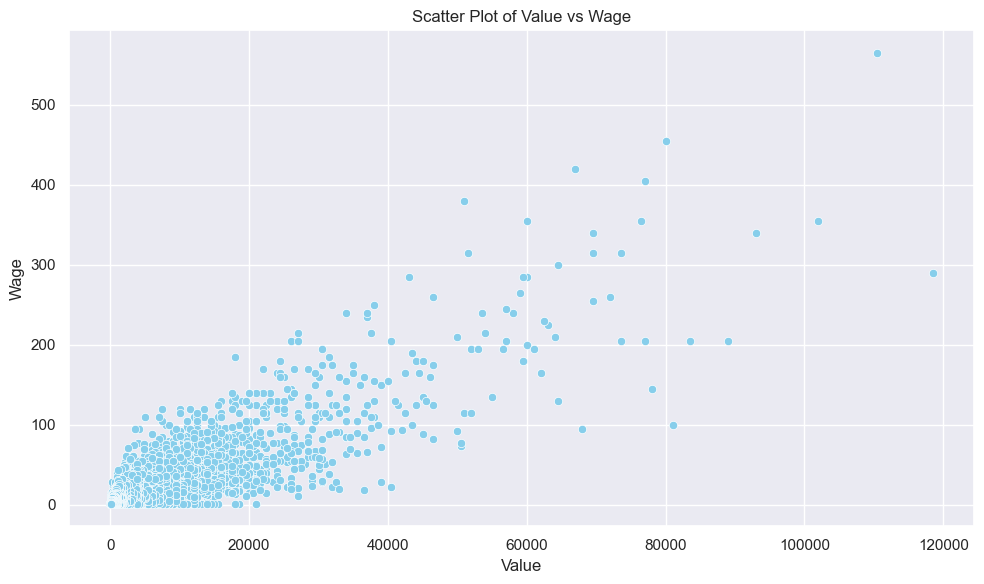

In [67]:
# Plot the scatter plot between Value and Wage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Value', y='Wage', color='skyblue')

# Add title and labels
plt.title('Scatter Plot of Value vs Wage')
plt.xlabel('Value')
plt.ylabel('Wage')

# Show the plot
plt.tight_layout()
plt.show()


In [73]:
value_nationality = df.groupby('Nationality')[['Value']].mean().sort_values(by='Value').head(10)
value_nationality

,Value
Nationality,
Puerto Rico,110.000000
Hong Kong,145.000000
Botswana,160.000000
Indonesia,180.000000
Ethiopia,250.000000
Belize,250.000000
South Sudan,260.000000
Guyana,276.666667
Andorra,290.000000


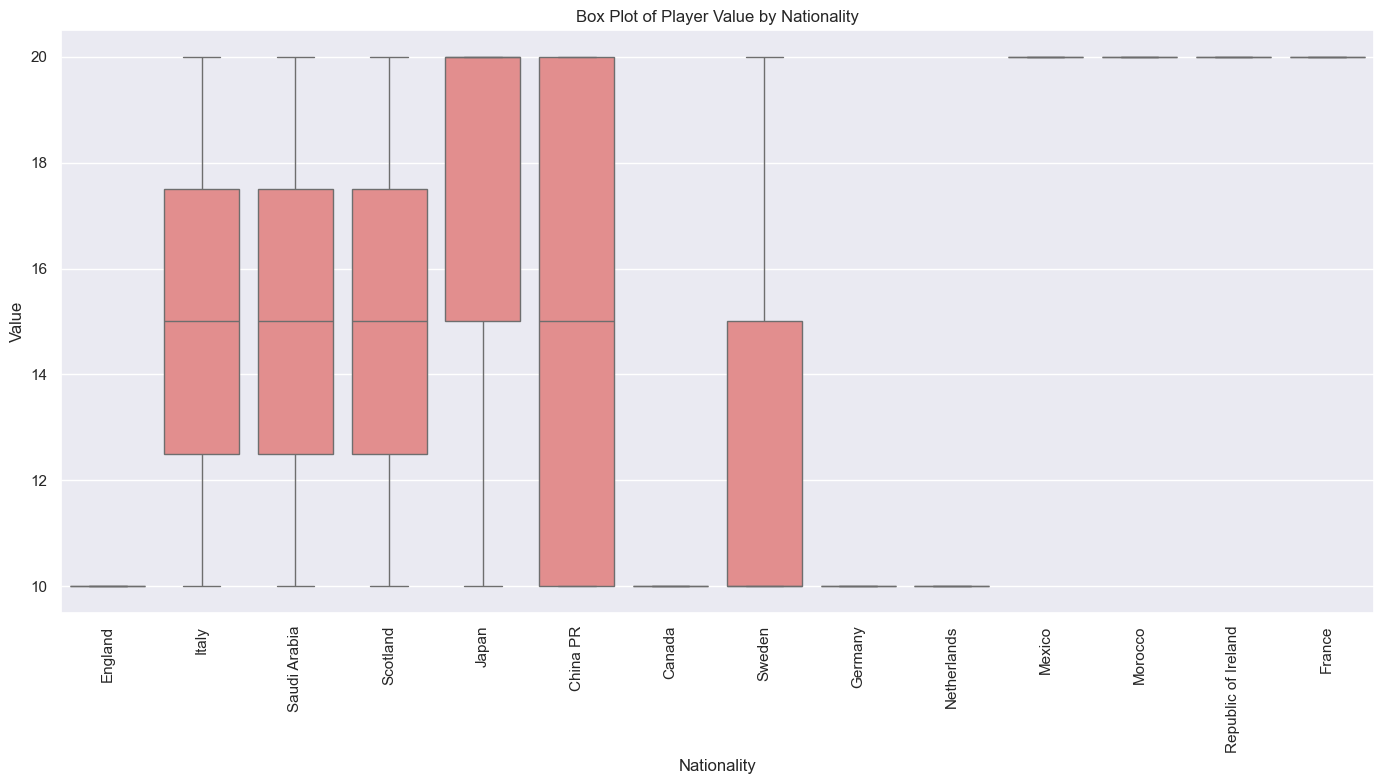

In [77]:
# Create the box plot of Value grouped by Nationality
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.sort_values(by='Value').head(30), x='Nationality', y='Value', color='lightcoral')

# Add title and labels
plt.title('Box Plot of Player Value by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


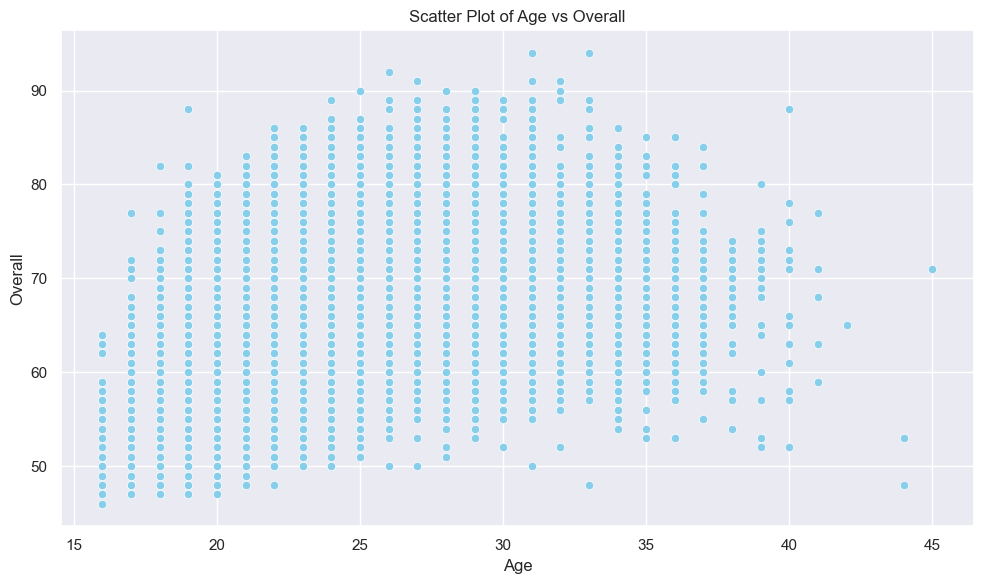

In [78]:
# Plot the scatter plot between Age and Overall
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Overall', color='skyblue')

# Add title and labels
plt.title('Scatter Plot of Age vs Overall')
plt.xlabel('Age')
plt.ylabel('Overall')

# Show the plot
plt.tight_layout()
plt.show()


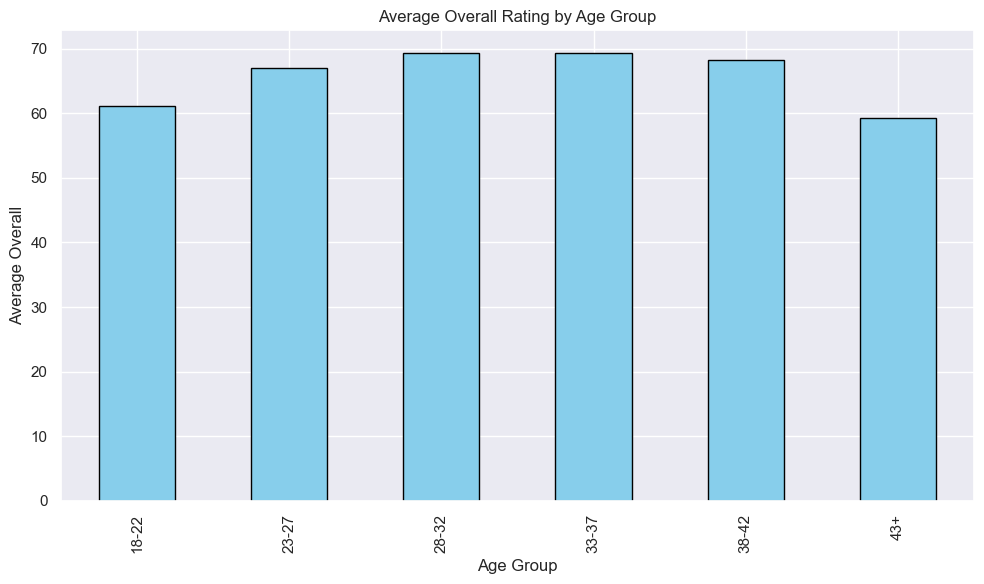

In [85]:
# Define the age groups (e.g., 18-22, 23-27, 28-32, etc.)
bins = [18, 22, 27, 32, 37, 42, 100]  # Adjust the age range as necessary
labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43+']

# Create a new column 'Age Group' based on the bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the average Overall rating for each age group
avg_overall_by_age_group = df.groupby('Age Group', observed=True)['Overall'].mean()

# Plot the average Overall by Age Group
plt.figure(figsize=(10, 6))
avg_overall_by_age_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Average Overall Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Overall')

# Show the plot
plt.tight_layout()
plt.show()

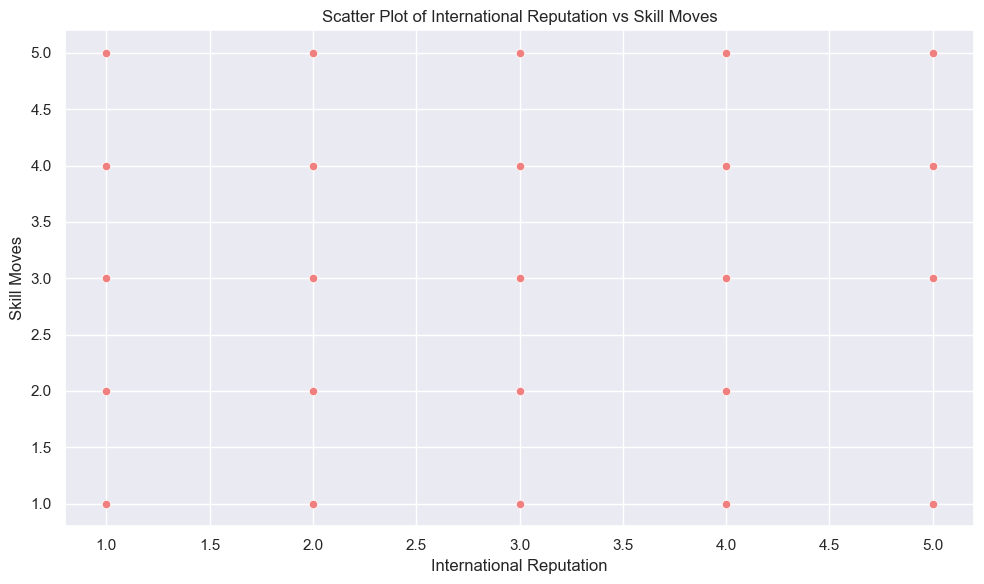

In [86]:
# Plot the scatter plot between International Reputation and Skill Moves
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='International Reputation', y='Skill Moves', color='lightcoral')

# Add title and labels
plt.title('Scatter Plot of International Reputation vs Skill Moves')
plt.xlabel('International Reputation')
plt.ylabel('Skill Moves')

# Show the plot
plt.tight_layout()
plt.show()

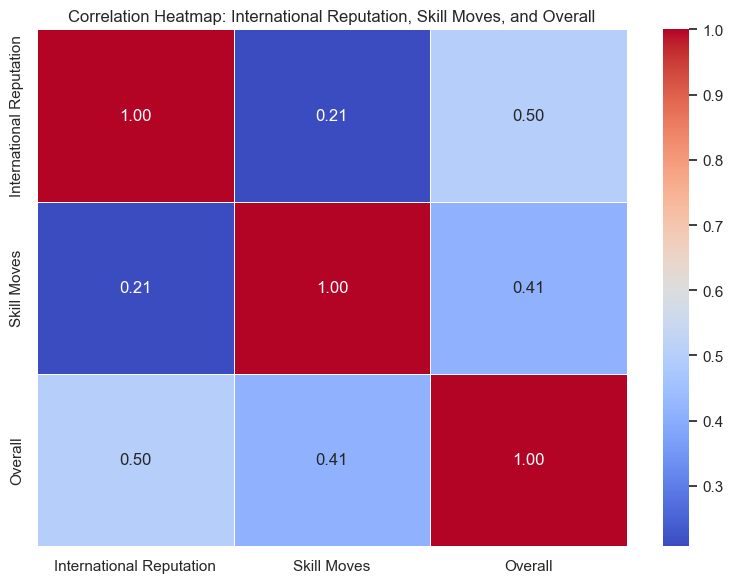

In [87]:
# Select the relevant columns for correlation
correlation_data = df[['International Reputation', 'Skill Moves', 'Overall']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap: International Reputation, Skill Moves, and Overall')

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
sns.set(rc = {'figure.figsize':(20,10)})

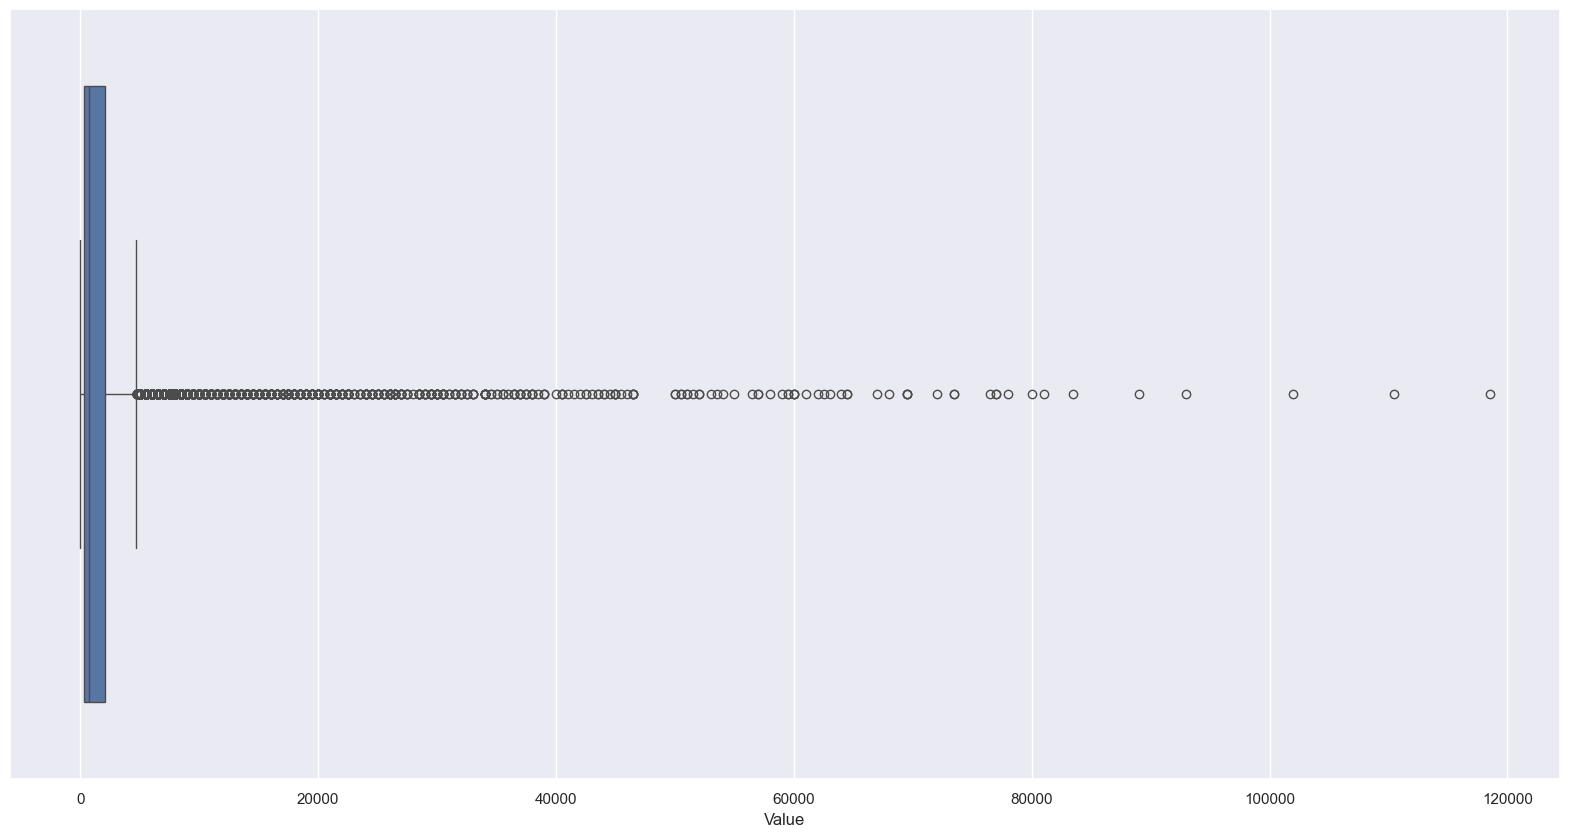

In [6]:
# player outliers
sns.boxplot(data=df,x='Value')
plt.show()

In [8]:
df.groupby('Nationality')['Wage'].mean().sort_values(ascending=False)

Nationality
Dominican Republic      71.000000
United Arab Emirates    39.000000
Gabon                   26.933333
Armenia                 22.000000
Croatia                 21.682540
                          ...    
Ethiopia                 1.000000
St Lucia                 1.000000
Nicaragua                1.000000
Bolivia                  0.833333
India                    0.000000
Name: Wage, Length: 164, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

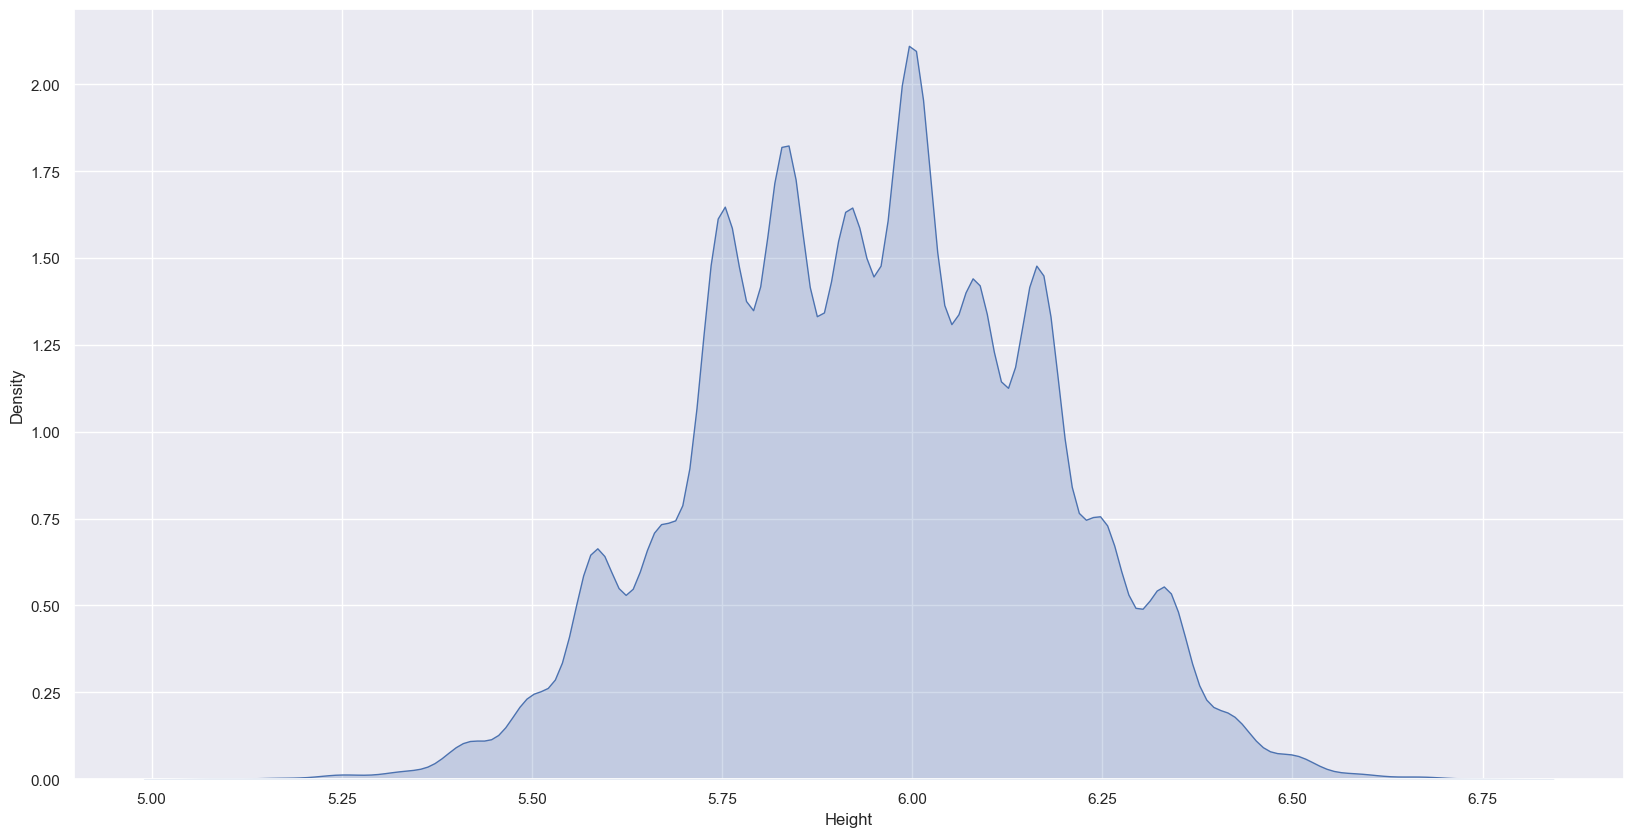

In [10]:
sns.kdeplot(data=df, x='Height',fill=True)

## What are thet top 10 clubs in the wage ?

In [11]:
df.groupby('Club')['Wage'].sum().sort_values(ascending=False).head(10)

Club
Real Madrid          5017.0
FC Barcelona         4837.0
Manchester City      3741.0
Manchester United    3391.0
Juventus             3292.0
Chelsea              3249.0
Liverpool            2902.0
Tottenham Hotspur    2623.0
Arsenal              2588.0
FC Bayern München    2286.0
Name: Wage, dtype: float64

In [12]:
top_10_wages_club_index =df.groupby('Club')['Wage'].sum().sort_values(ascending=False).head(10).index

In [13]:
top_10_wages_club_index

Index(['Real Madrid', 'FC Barcelona', 'Manchester City', 'Manchester United',
       'Juventus', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Arsenal',
       'FC Bayern München'],
      dtype='object', name='Club')

In [14]:
top_10_wages_club = df[df['Club'].isin(top_10_wages_club_index)]

<Axes: xlabel='Club', ylabel='Wage'>

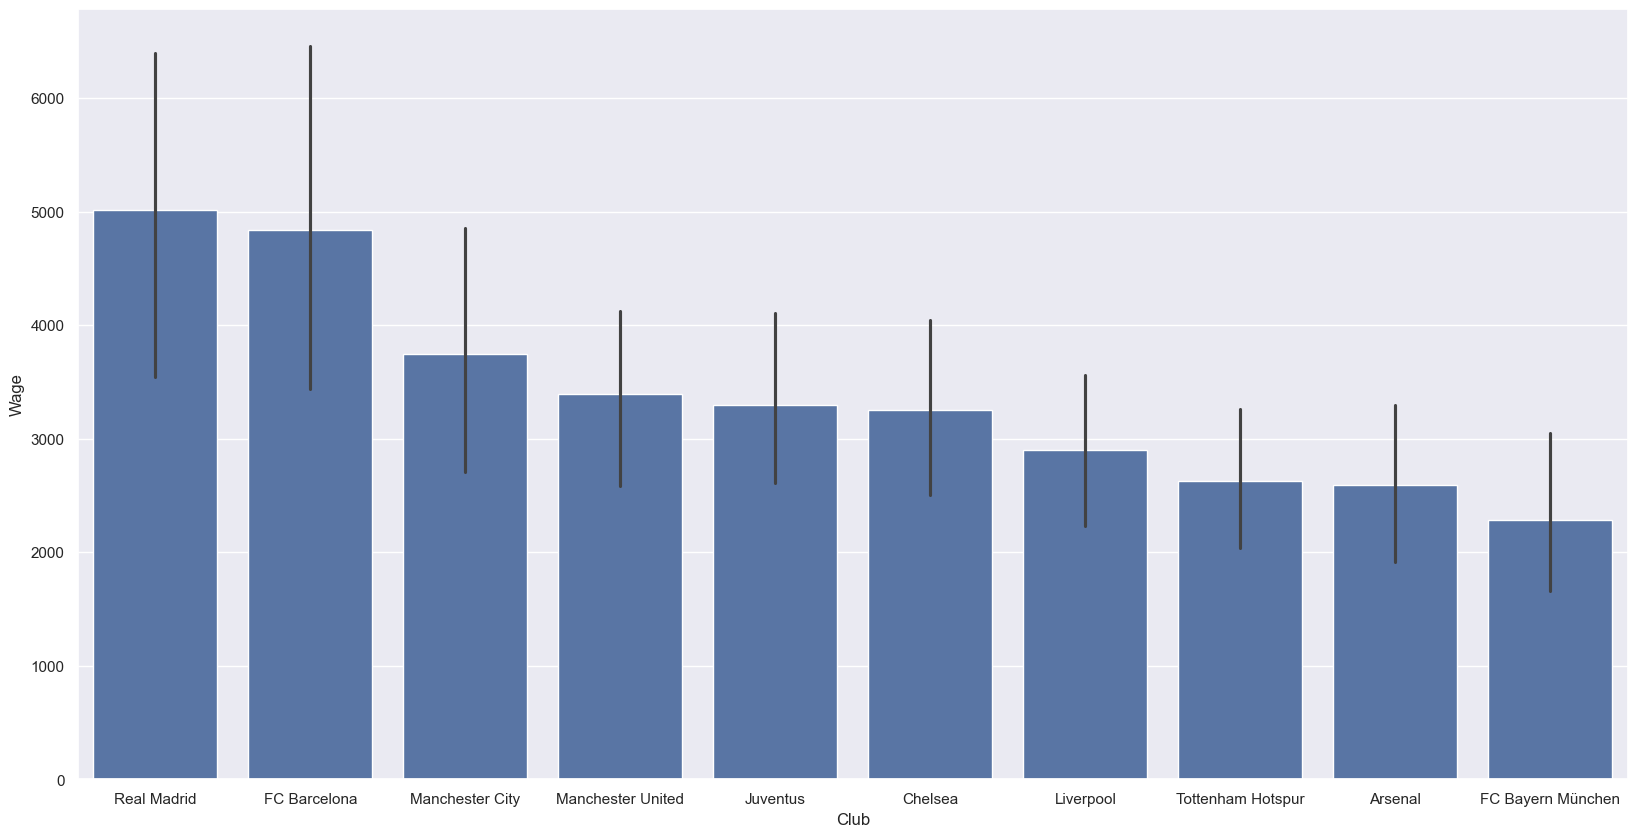

In [15]:
sns.barplot(data=top_10_wages_club,x='Club',y='Wage',estimator= sum, order=top_10_wages_club_index)

In [16]:
grouped=df.groupby('Club')['Wage'].sum().sort_values(ascending=False).head(10)

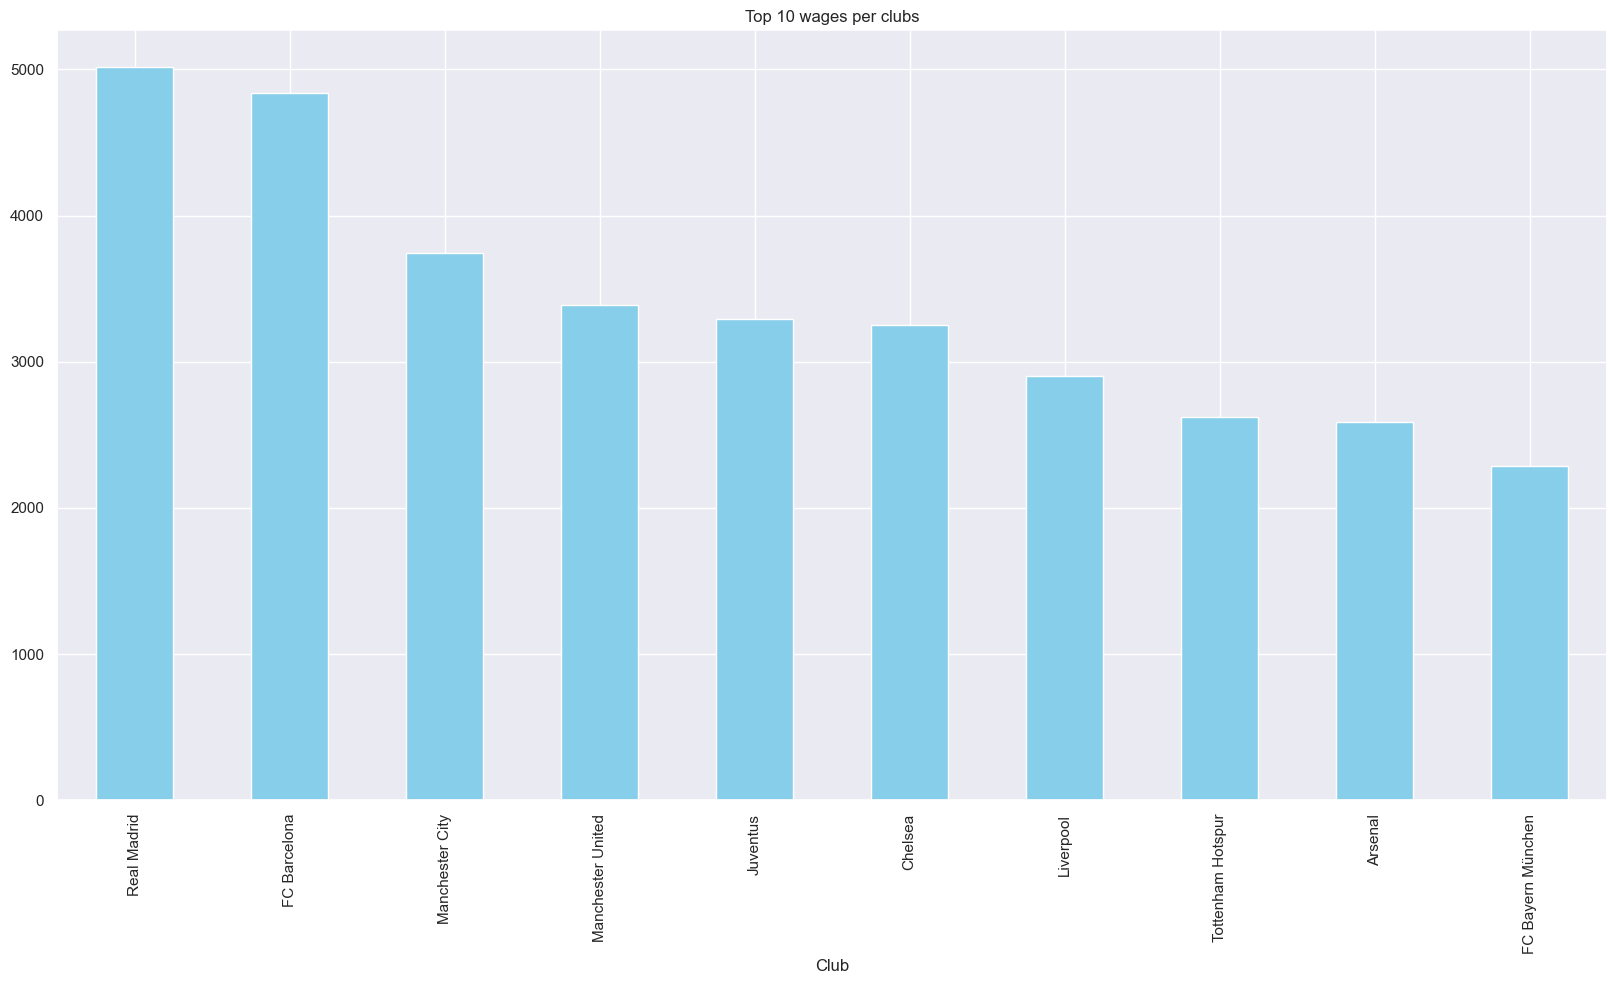

In [17]:
grouped.plot.bar(color='skyblue')
plt.title('Top 10 wages per clubs')
plt.show()